In [127]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 8)

**Proposal - Group 59**

**Title: Gender Disparities in Heart Disease Risk Factors and Prevalence: Exploring the Impact of Key Predictive Variables**

Heart disease is a significant global health concern affecting both men and women. Gender differences exist in the prevalence, risk factors, and manifestations of heart disease. Understanding these gender-specific aspects is crucial for effective prevention and treatment strategies. Factors such as cholesterol levels, age, blood pressure, electrocardiographic results, maximum heart rate achieved, and sex can contribute to heart disease development. By analyzing these key predictive variables, including their relationship with different genders, we aim to identify which gender is more affected by heart disease. This research will contribute to our knowledge of gender-specific factors influencing heart disease and facilitate the development of targeted interventions for improved cardiovascular health.

In [128]:
heart_disease <-read_csv("heart_disease_uci.csv")

specific_data<- select(heart_disease, -num, - thal, -slope, -dataset, -oldpeak, -exang, -id, -ca, -fbs)
specific_data

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,restecg,thalch
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
63,Male,typical angina,145,233,lv hypertrophy,150
67,Male,asymptomatic,160,286,lv hypertrophy,108
67,Male,asymptomatic,120,229,lv hypertrophy,129
37,Male,non-anginal,130,250,normal,187
⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Male,typical angina,NA,139,st-t abnormality,NA
55,Male,asymptomatic,122,223,st-t abnormality,100
58,Male,asymptomatic,NA,385,lv hypertrophy,NA
62,Male,atypical angina,120,254,lv hypertrophy,93


**Clearly state the question you will try to answer with your project**:

In this project, our main question revolves around determining which gender is more likely to develop heart disease based on potential contributing factors, " Which gender has more chance to get heart disease by considering the features that might cause the heart disease?". To answer this question, we will analyze various variables that are known to be associated with heart disease. By examining these variables, we aim to identify any disparities between males and females in terms of their susceptibility to heart disease. We will explore the relationship between gender and these contributing factors, seeking to understand which gender exhibits a higher risk for developing heart disease. By conducting a thorough analysis, we hope to shed light on the gender-specific aspects of heart disease and contribute to a better understanding of this health issue.

To answer our question, we will consider several useful variables that impact CP. These variables include cholesterol levels, age, resting blood pressure, resting electrocardiographic results, maximum heart rate achieved, and sex (color). By examining these factors, we can gain insights into the cardiovascular performance and better understand its relationship with these variables. 

For the preliminary exploratory data analysis, we will demonstrate that the dataset can be read from the web into R. We will organize the data into a single table with multiple columns. We will also clean and wrangle the data to ensure it is in a tidy format, making visualization easy. We will then explore the dataset using summary statistics, visualizations, and statistical tests. Our aim is to identify relationships between variables and understand the distribution of the target variable. To facilitate understanding, we color-label certain variables. Additionally, we will compare age and sex with multiple variables within the dataset, utilizing various plots to demonstrate specific relationships between them.

**Methods**:
1. Find each gender’s most chest pain type by selecting sex and cp columns. Then we are going to create a bar graph and colour males and females differently. Create a scatter graph age against cp by selecting age and cp columns. 
2. Comparing each gender by cholesterol and find which gender has higher cholesterol rate. We are going to select sex, and chol columns. Then we are going to mutate the data and find the average chol rate for each sex. Then create the bar graph of sex against average chol rate and colour males and females differently. 
3. Comparing each gender by resting blood pressure and finding which gender has higher resting blood pressure rate. We are going to select sex, and trestbps columns. Then we are going to mutate the data and find the average trestbps rate for each sex. 
4. Then create the bar graph of sex against average trestbps rate and colour males and females differently. 
5. Find each gender’s most resting electrocardiographic results by selecting sex, and restecg columns. Then we are going to create a bar graph and colour males and females differently.
6. Comparing each gender by maximum heart rate achieved and finding which gender has higher maximum heart rate achieved. We are going to select sex, and thalach columns. Then we are going to mutate the data and find the average thalach rate for each sex. Then create the bar graph of sex against average thalach rate and colour males and females differently.
7. Finally, combine all features against gender together and see what results we get.  

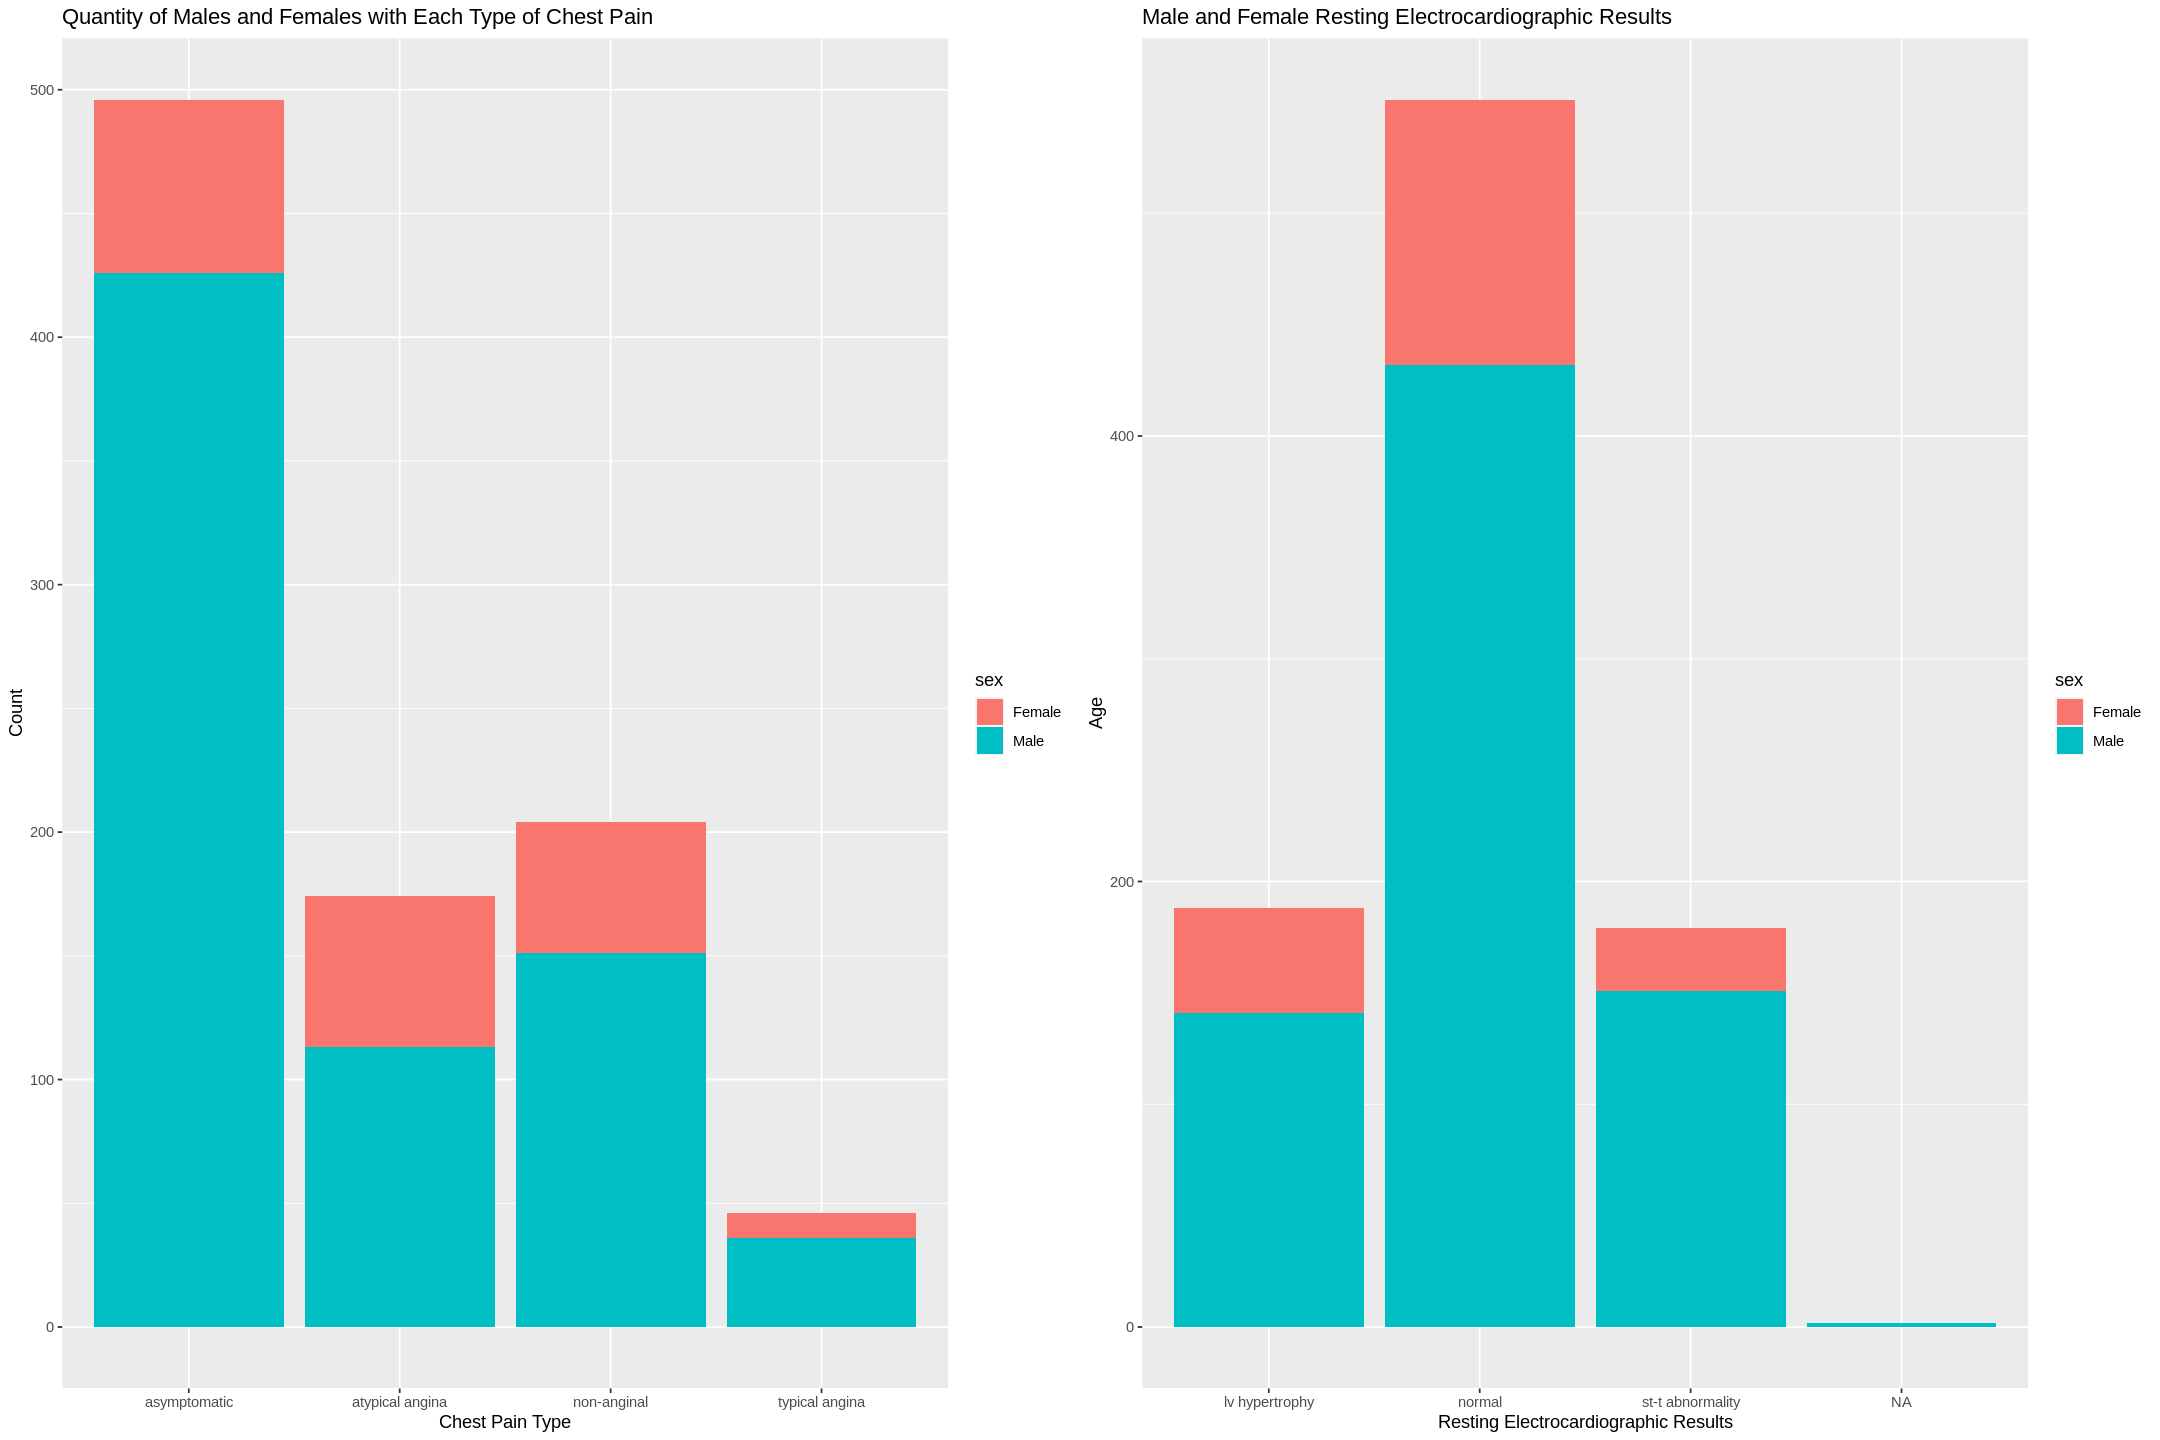

sex,max_restecg
<chr>,<chr>
Female,st-t abnormality
Male,NA


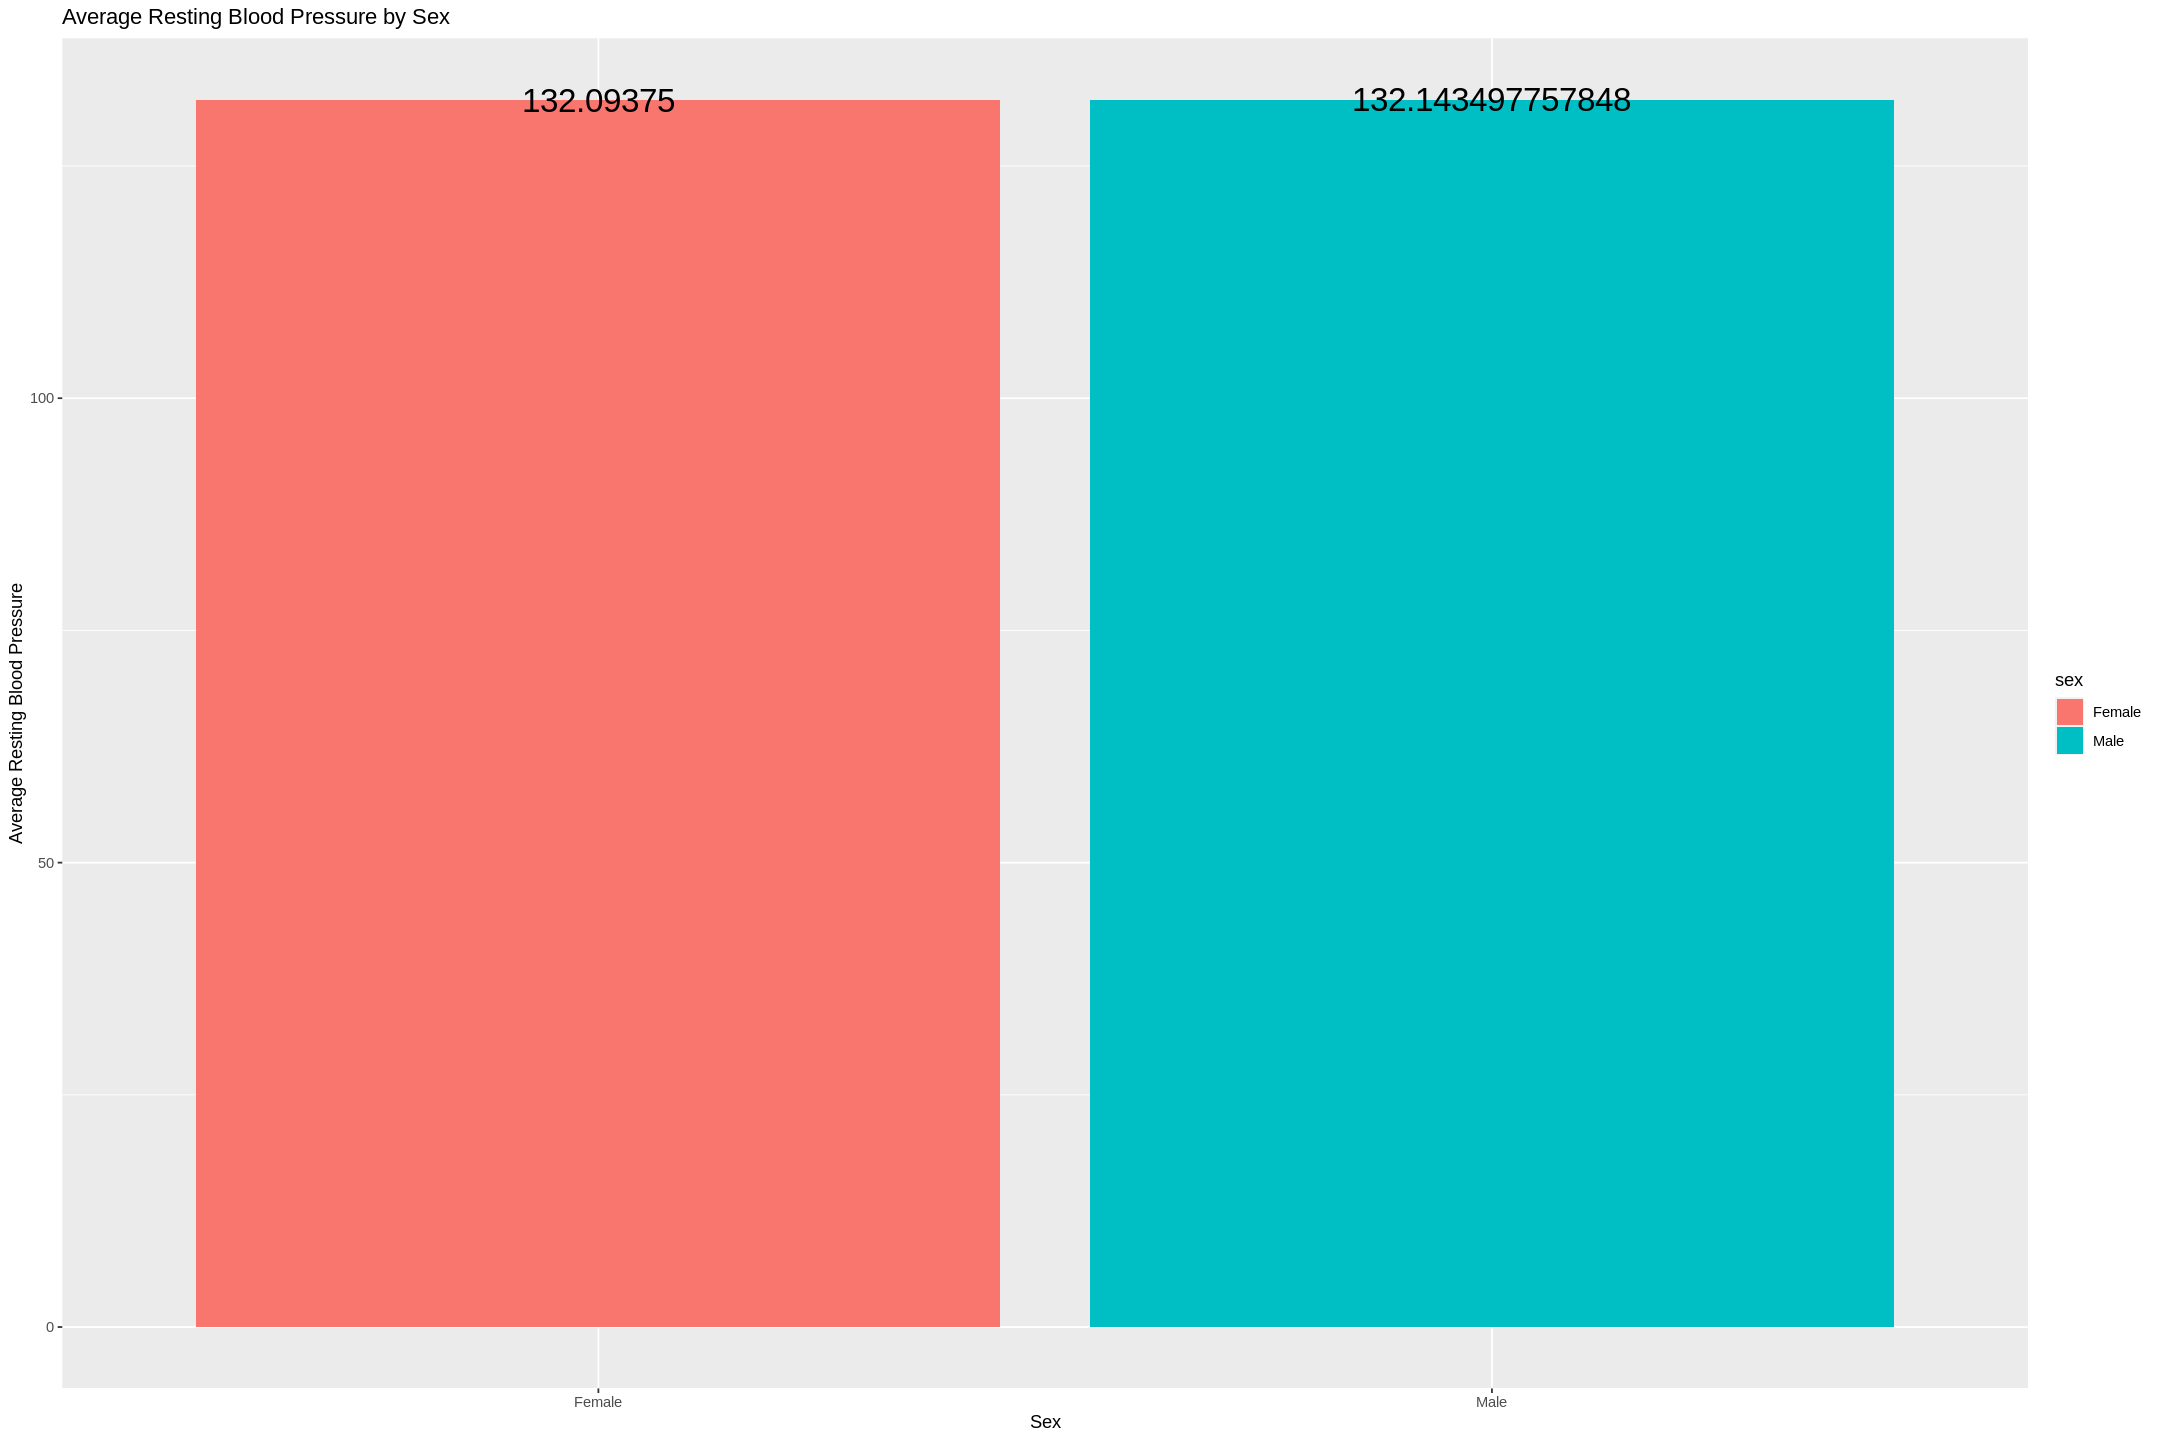

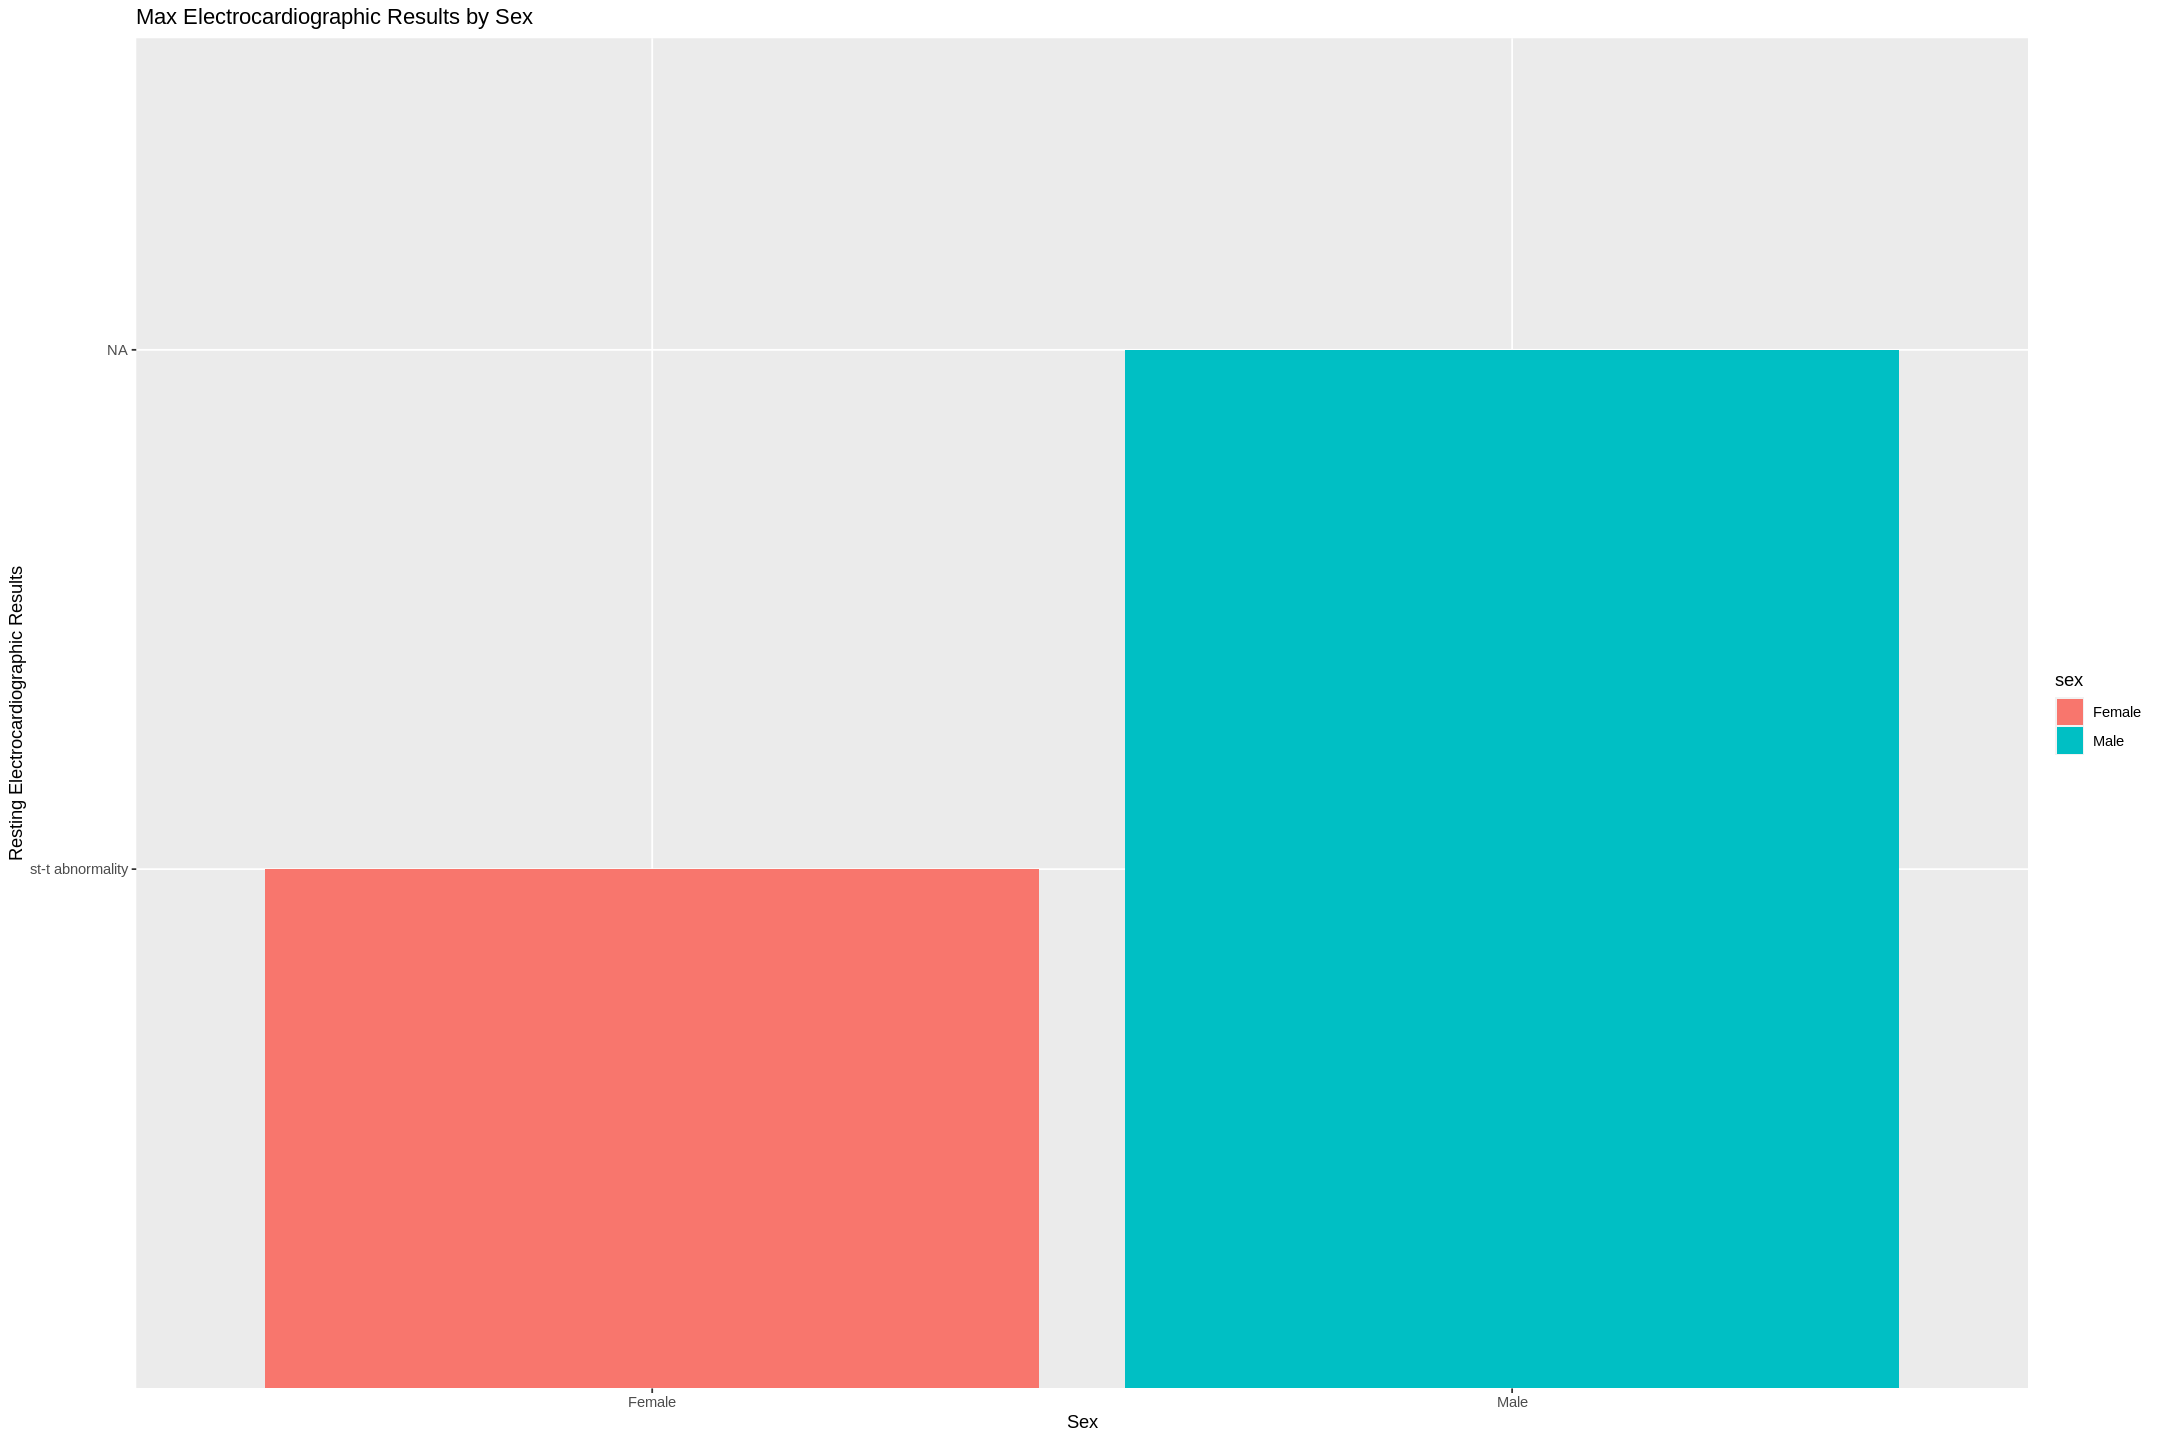

In [129]:
#SEX VS CP PLOT
sex_cp_plot<- ggplot(specific_data, aes(x = cp, fill = sex)) +
  geom_bar() +
  labs(title = "Quantity of Males and Females with Each Type of Chest Pain",
       x = "Chest Pain Type", y = "Count") 

#SEX VS RESTECG PLOT
sex_restecg_plot<- ggplot(specific_data, aes(x = restecg, fill = sex)) +
  geom_bar() +
  labs(title = "Male and Female Resting Electrocardiographic Results",
       x = "Resting Electrocardiographic Results", y = "Age") 

options(repr.plot.width = 18, repr.plot.height = 12)
#MADE BOTH PLOTS TO BE SIDE BY SIDE
grid.arrange(sex_cp_plot, sex_restecg_plot, ncol = 2)

#SEX VS RESTING BLOOD PRESSURE GRAPHS
sex_trestbps <- specific_data |>
  group_by(sex) |>
  summarize(avg_trestbps = mean(trestbps, na.rm = TRUE))

sex_trestbps_plot <- ggplot(sex_trestbps, aes(x = sex, y = avg_trestbps, fill = sex)) +
  geom_bar(stat = "identity") +
   geom_text(aes(label = avg_trestbps), size = 7) +
  labs(title = "Average Resting Blood Pressure by Sex",
       x = "Sex", y = "Average Resting Blood Pressure")
sex_trestbps_plot

#SEX VS RESTECG PLOT FOR N5
sex_restecg <- specific_data |>
  group_by(sex) |>
  summarize(max_restecg = max(restecg))
sex_restecg
#HERE THERE ARE NA VALUES FOR MALE, I DONT KNOW HOW TO TAKE THEM OFF, FEMALE IS ALRIGHT. ^

# Bar graph: Resting Electrocardiographic Results by Sex
restecg_plot <- ggplot(sex_restecg, aes(x = sex, y = max_restecg, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Max Electrocardiographic Results by Sex",
       x = "Sex", y = "Resting Electrocardiographic Results")
restecg_plot

**Expected outcomes and significance**:

In our project, we expect to find differences between genders and positive correlations between cholesterol, age, resting blood pressure, resting electrocardiographic results, and heart disease (chest pain). Conversely, we anticipate a negative correlation between maximum heart rate achieved and heart disease, as a higher maximum heart rate often indicates better health but tends to decrease with age. These findings will provide valuable insights into the relationship between these selected factors and heart disease, shedding light on the contributing factors and potential preventive measures. Understanding the impact of these factors on the probability of developing heart disease could lead to further inquiries into lifestyle choices and environmental factors that contribute to this condition. We may explore strategies to reduce the impact of these factors and assess the extent to which lifestyle choices can prevent heart disease. Furthermore, our research may delve into the intriguing "nature vs nurture" debate, examining how genetics and environmental factors influence the likelihood of developing heart disease.
